In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from brokenaxes import brokenaxes
#直方圖與摺線圖需要深思熟慮一下

In [2]:
# import matplotlib as mpl

# mpl.rcParams['axes.labelsize'] = 10
# mpl.rcParams['xtick.labelsize'] = 10
# mpl.rcParams['ytick.labelsize'] = 10
# mpl.rcParams['legend.fontsize'] = 10
# mpl.rcParams['font.family'] = ['sans-serif']
# mpl.rcParams['font.sans-serif'] = ['Arial']
# mpl.rcParams['text.usetex'] = False
# mpl.rcParams['svg.fonttype'] = 'none'

In [3]:
want_data = '_val' # _train, _val
use_smooth = True
save_fig = False

show_label_start = 0
show_label_end = 50

def lbound(x):
    a = []
    for i in x:
        a.append(max(0.0,i))
    return a
def hbound(x):
    a = []
    for i in x:
        a.append(min(1.0,i))
    return a

In [3]:
#2
if 'train' in want_data:
    baseline_dl = [3.293517827987671, 3.2150814056396486, 3.0138514041900635, 2.399050998687744, 1.8864464521408082, 1.8064842224121094, 1.7463931560516357, 1.6381738424301147, 1.4969715356826783, 1.3957726240158081, 1.298223328590393, 1.2042699575424194, 1.1134011030197144, 1.0262481451034546, 0.9534106016159057, 0.8913405776023865, 0.8298004388809204, 0.7795039176940918, 0.7452423930168152, 0.7183407664299011, 0.6882552027702331, 0.6635205864906311, 0.6544955492019653, 0.6354733109474182, 0.6234924674034119, 0.6254611372947693, 0.5957239031791687, 0.5882133722305298, 0.5702546954154968, 0.5598153114318848, 0.5454111933708191, 0.529938280582428, 0.5242432117462158, 0.5127673923969269, 0.5027211248874665, 0.5021922767162323, 0.5014163434505463, 0.48809821009635923, 0.48127795457839967, 0.4762150526046753, 0.46903948187828065, 0.45966736078262327, 0.4566409945487976, 0.4542220115661621, 0.44897828698158265, 0.43747310638427733, 0.4327620446681976, 0.41990514397621154, 0.4127758741378784, 0.41898673176765444]
    baseline_la = [3.2956568241119384, 3.212844705581665, 2.989592456817627, 2.239936947822571, 1.842091727256775, 1.7881028175354003, 1.634268832206726, 1.4559947729110718, 1.2969346046447754, 1.1557517051696777, 1.033458685874939, 0.9201012492179871, 0.833273184299469, 0.7750367760658264, 0.7287617802619935, 0.6902573823928833, 0.6611653089523315, 0.6263390302658081, 0.6055751800537109, 0.5863915324211121, 0.5730818748474121, 0.5526156902313233, 0.5392368793487549, 0.5263244867324829, 0.5164699256420135, 0.5045653522014618, 0.4972917020320892, 0.48681469559669494, 0.47102333307266236, 0.45419833064079285, 0.44474116563796995, 0.4300481677055359, 0.42491058111190794, 0.42480423450469973, 0.4298857688903809, 0.5005337774753571, 0.48475934863090514, 0.4255207061767578, 0.40199772715568544, 0.38063888549804686, 0.37821999192237854, 0.3693679869174957, 0.36293198466300963, 0.35757759809494016, 0.3520787239074707, 0.34620662331581115, 0.3432953655719757, 0.3420872211456299, 0.3375009119510651, 0.3358263850212097]
else: 
    baseline_dl = [3.2620506286621094, 3.144662857055664, 2.782257080078125, 2.0153934955596924, 1.8582189083099365, 1.7943456172943115, 1.7066031694412231, 1.55084228515625, 1.435892939567566, 1.3395229578018188, 1.2488529682159424, 1.1580077409744263, 1.0650396347045898, 0.9851482510566711, 0.9119371175765991, 0.8649606108665466, 0.8106685280799866, 0.7673366665840149, 0.7452459931373596, 0.7109582424163818, 0.686971127986908, 0.6797603964805603, 0.6487559676170349, 0.6425890326499939, 0.6648390889167786, 0.6170950531959534, 0.5934494137763977, 0.5853225588798523, 0.5734785795211792, 0.5568828582763672, 0.548161506652832, 0.535370945930481, 0.5235083699226379, 0.5140827894210815, 0.5097945332527161, 0.5075446367263794, 0.4940940737724304, 0.48243388533592224, 0.4807884991168976, 0.47951650619506836, 0.467181921005249, 0.45892569422721863, 0.4757235050201416, 0.44853857159614563, 0.43966811895370483, 0.43900665640830994, 0.4271604120731354, 0.4178186058998108, 0.4128786623477936, 0.43365657329559326]
    baseline_la = [3.2619190216064453, 3.135776996612549, 2.720820188522339, 1.896746039390564, 1.8113112449645996, 1.728922963142395, 1.5371465682983398, 1.3493694067001343, 1.1971272230148315, 1.0688691139221191, 0.9538275599479675, 0.8716318607330322, 0.8060386776924133, 0.7655373811721802, 0.7096623778343201, 0.6890769004821777, 0.6497524976730347, 0.6388217806816101, 0.616982102394104, 0.5950242877006531, 0.5755366683006287, 0.5584285259246826, 0.5484035015106201, 0.5401149988174438, 0.5228549838066101, 0.5105476379394531, 0.5059248805046082, 0.48306596279144287, 0.46855321526527405, 0.45611098408699036, 0.4376738667488098, 0.4314817786216736, 0.42419737577438354, 0.41419872641563416, 0.5395247340202332, 0.5512279868125916, 0.44640469551086426, 0.4363543689250946, 0.39609745144844055, 0.37791427969932556, 0.38822510838508606, 0.36967235803604126, 0.3765992224216461, 0.3590397834777832, 0.35893502831459045, 0.35449281334877014, 0.3484821617603302, 0.3473212420940399, 0.3464658558368683, 0.3485149145126343]

## 做FL在不同epoch的比較

In [65]:
# deeplog 1 epochs
log_algo = 'deeplog'
fl_algo = 'fedadam_21'

dl_12_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_12_adam_loss = np.sum([dl_12_adam_loss, df['loss']], axis = 0)
    del df
    
dl_12_adam_loss = dl_12_adam_loss/5

# deeplog 10 epochs
log_algo = 'deeplog'
fl_algo = 'fedadam_10e_12'

dl_102_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_102_adam_loss = np.sum([dl_102_adam_loss, df['loss']], axis = 0)
    del df
    
dl_102_adam_loss = dl_102_adam_loss/5

In [58]:
# loganomaly 1 epochs
log_algo = 'loganomaly'
fl_algo = 'fedavg_11'

la_11_avg_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_11_avg_loss = np.sum([la_11_avg_loss, df['loss']], axis = 0)
    del df
    
la_11_avg_loss = la_11_avg_loss/5
#####################################
fl_algo = 'fedadam_11'

la_11_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_11_adam_loss = np.sum([la_11_adam_loss, df['loss']], axis = 0)
    del df
    
la_11_adam_loss = la_11_adam_loss/5
#####################################
fl_algo = 'fedavg_21'

la_12_avg_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_12_avg_loss = np.sum([la_12_avg_loss, df['loss']], axis = 0)
    del df
    
la_12_avg_loss = la_12_avg_loss/5
#####################################
fl_algo = 'fedadam_1e_12'

la_12_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_12_adam_loss = np.sum([la_12_adam_loss, df['loss']], axis = 0)
    del df
    
la_12_adam_loss = la_12_adam_loss/5
#####################################
fl_algo = 'fedavg_31'

la_13_avg_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_13_avg_loss = np.sum([la_13_avg_loss, df['loss']], axis = 0)
    del df
    
la_13_avg_loss = la_13_avg_loss/5
#####################################
fl_algo = 'fedadam_31'

la_13_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_13_adam_loss = np.sum([la_13_adam_loss, df['loss']], axis = 0)
    del df
    
la_13_adam_loss = la_13_adam_loss/5

In [59]:
# loganomaly 10 epochs
log_algo = 'loganomaly'
fl_algo = 'fedavg_10e_11'

la_101_avg_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_101_avg_loss = np.sum([la_101_avg_loss, df['loss']], axis = 0)
    del df
    
la_101_avg_loss = la_101_avg_loss/5
#####################################
fl_algo = 'fedadam_10e_11'

la_101_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_101_adam_loss = np.sum([la_101_adam_loss, df['loss']], axis = 0)
    del df
    
la_101_adam_loss = la_101_adam_loss/5
#####################################
fl_algo = 'fedavg_10e_12'

la_102_avg_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_102_avg_loss = np.sum([la_102_avg_loss, df['loss']], axis = 0)
    del df
    
la_102_avg_loss = la_102_avg_loss/5
#####################################
fl_algo = 'fedadam_10e_12'

la_102_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_102_adam_loss = np.sum([la_102_adam_loss, df['loss']], axis = 0)
    del df
    
la_102_adam_loss = la_102_adam_loss/5
#####################################
fl_algo = 'fedavg_10e_13'

la_103_avg_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_103_avg_loss = np.sum([la_103_avg_loss, df['loss']], axis = 0)
    del df
    
la_103_avg_loss = la_103_avg_loss/5
#####################################
fl_algo = 'fedadam_10e_13'

la_103_adam_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_103_adam_loss = np.sum([la_103_adam_loss, df['loss']], axis = 0)
    del df
    
la_103_adam_loss = la_103_adam_loss/5

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


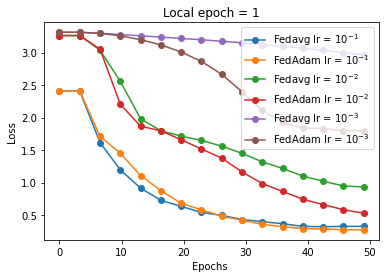

In [6]:
name = ['Fedavg lr = $10^{-1}$','FedAdam lr = $10^{-1}$','Fedavg lr = $10^{-2}$','FedAdam lr = $10^{-2}$','Fedavg lr = $10^{-3}$','FedAdam lr = $10^{-3}$']
data_1 = ['la_11_avg_loss', 'la_11_adam_loss','la_12_avg_loss', 'la_12_adam_loss','la_13_avg_loss', 'la_13_adam_loss']
data_2 = ['la_101_avg_loss', 'la_101_adam_loss','la_102_avg_loss', 'la_102_adam_loss','la_103_avg_loss', 'la_103_adam_loss']
for j, i in enumerate(data_1):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j], marker = 'o')
        continue
    plt.plot(x, y, label = name[j])


plt.xlabel('Epochs ')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Local epoch = 1')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_v2/1e.svg', bbox_inches='tight', format="svg")
plt.show()

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


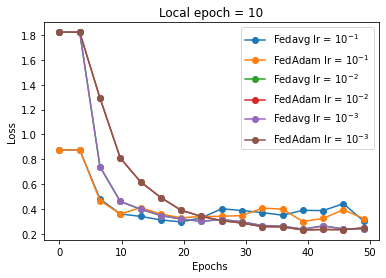

In [7]:
name = ['Fedavg lr = $10^{-1}$','FedAdam lr = $10^{-1}$','Fedavg lr = $10^{-2}$','FedAdam lr = $10^{-2}$','Fedavg lr = $10^{-3}$','FedAdam lr = $10^{-3}$']
data_1 = ['la_11_avg_loss', 'la_11_adam_loss','la_12_avg_loss', 'la_12_adam_loss','la_13_avg_loss', 'la_13_adam_loss']
data_2 = ['la_101_avg_loss', 'la_101_adam_loss','la_102_avg_loss', 'la_102_adam_loss','la_103_avg_loss', 'la_103_adam_loss']
for j, i in enumerate(data_2):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j], marker = 'o')
        continue
    plt.plot(x, y, label = name[j])


plt.xlabel('Epochs ')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Local epoch = 10')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_v2/10e.svg', bbox_inches='tight', format="svg")
plt.show()

## 用戶數量不同的效果

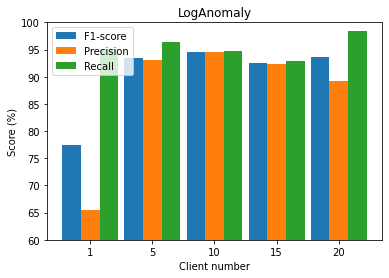

In [4]:
x = ["1", "5", "10", "15", "20"]
x_axis = np.arange(len(x))
width = 0.3
f1s = [77.506, 93.417, 94.636, 92.610, 93.599]
pre = [65.442, 93.030, 94.557, 92.306, 89.248]
rec = [95.023, 96.328, 94.714, 92.915, 98.396]

plt.bar(x_axis - width, f1s, width=width, label = 'F1-score')
plt.bar(x_axis, pre, width=width, label = 'Precision')
plt.bar(x_axis + width, rec, width=width, label = 'Recall')

plt.title("LogAnomaly")
plt.xticks(x_axis, x)
plt.ylim(60, 100)
plt.xlabel("Client number")
plt.ylabel("Score (%)")
plt.legend()
if save_fig:
    plt.savefig('../result/fig_add/client_la_f1.svg', bbox_inches='tight', format="svg")
plt.show()

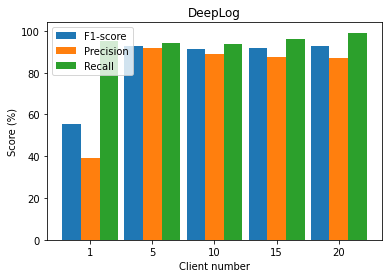

In [5]:
x = ["1", "5", "10", "15", "20"]
x_axis = np.arange(len(x))
width = 0.3
f1s = [55.540, 92.868, 91.252, 91.688, 92.761]
pre = [39.225, 91.654, 88.787, 87.689, 87.140]
rec = [95.094, 94.115, 93.859, 96.068, 99.157]

plt.bar(x_axis - width, f1s, width=width, label = 'F1-score')
plt.bar(x_axis, pre, width=width, label = 'Precision')
plt.bar(x_axis + width, rec, width=width, label = 'Recall')

plt.title("DeepLog")
plt.xticks(x_axis, x)
# plt.ylim(30, 100)
plt.xlabel("Client number")
plt.ylabel("Score (%)")
plt.legend()
if save_fig:
    plt.savefig('../result/fig_add/client_dl_f1.svg', bbox_inches='tight', format="svg")
plt.show()

In [6]:
x = ["1", "5", "10", "15", "20"]
x_axis = np.arange(len(x))
width = 0.3
f1s_dl = [55.540, 92.868, 91.252, 91.688, 92.761]
f1s_la = [77.506, 93.417, 94.636, 92.610, 93.599]

plt.bar(x_axis - width/2, f1s_dl, width=width, label = 'DeepLog')
plt.bar(x_axis + width/2, f1s_la, width=width, label = 'LogAnomaly')

plt.title("The effect of client number")
plt.xticks(x_axis, x)
plt.ylim(30, 100)
plt.xlabel("Client number")
plt.ylabel("F1-score (%)")
plt.legend()
if save_fig:
#     plt.savefig('../result/fig_v2/10e.svg', bbox_inches='tight', format="svg")
plt.show()

IndentationError: expected an indented block (<ipython-input-6-6825d9d42f2f>, line 18)

In [5]:
# loganomaly 
# 1 clients
log_algo = '01_la_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

la_01_loss = np.zeros(shape=(50))

for i in range(1,2):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_01_loss = np.sum([la_01_loss, df['loss']], axis = 0)
    del df
    
la_01_loss = la_01_loss/1
#####################################
# 5 clients
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

la_05_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_05_loss = np.sum([la_05_loss, df['loss']], axis = 0)
    del df
    
la_05_loss = la_05_loss/5
#####################################
# 10 clients
log_algo = '10_la_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

la_10_loss = np.zeros(shape=(50))

for i in range(1,11):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_10_loss = np.sum([la_10_loss, df['loss']], axis = 0)
    del df
    
la_10_loss = la_10_loss/10
#####################################
# 15 clients
log_algo = '15_la_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

la_15_loss = np.zeros(shape=(50))

for i in range(1,16):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_15_loss = np.sum([la_15_loss, df['loss']], axis = 0)
    del df
    
la_15_loss = la_15_loss/15
#####################################
# 20 clients
log_algo = '20_la_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

la_20_loss = np.zeros(shape=(50))

for i in range(1,21):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_20_loss = np.sum([la_20_loss, df['loss']], axis = 0)
    del df
    
la_20_loss = la_20_loss/20

In [6]:
# deeplog 
# 1 clients
log_algo = '01_dl_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

dl_01_loss = np.zeros(shape=(50))

for i in range(1,2):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_01_loss = np.sum([dl_01_loss, df['loss']], axis = 0)
    del df
    
dl_01_loss = dl_01_loss/1
#####################################
# 5 clients
log_algo = 'deeplog_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

dl_05_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_05_loss = np.sum([dl_05_loss, df['loss']], axis = 0)
    del df
    
dl_05_loss = dl_05_loss/5
#####################################
# 10 clients
log_algo = '10_dl_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

dl_10_loss = np.zeros(shape=(50))

for i in range(1,11):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_10_loss = np.sum([dl_10_loss, df['loss']], axis = 0)
    del df
    
dl_10_loss = dl_10_loss/10
#####################################
# 15 clients
log_algo = '15_dl_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

dl_15_loss = np.zeros(shape=(50))

for i in range(1,16):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_15_loss = np.sum([dl_15_loss, df['loss']], axis = 0)
    del df
    
dl_15_loss = dl_15_loss/15
#####################################
# 20 clients
log_algo = '20_dl_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

dl_20_loss = np.zeros(shape=(50))

for i in range(1,21):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_20_loss = np.sum([dl_20_loss, df['loss']], axis = 0)
    del df
    
dl_20_loss = dl_20_loss/20

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


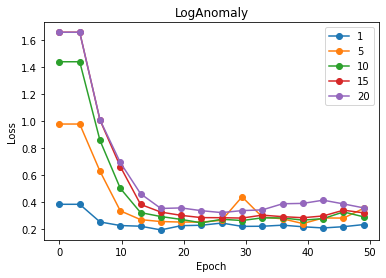

In [7]:
data = ['la_01_loss','la_05_loss','la_10_loss','la_15_loss','la_20_loss']
name = ['1', '5', '10', '15', '20']
for j, i in enumerate(data):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j], marker = 'o')
        continue
    plt.plot(x, y, label = name[j])


plt.xlabel('Epoch')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('LogAnomaly')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_add/client_la_loss.svg', bbox_inches='tight', format="svg")
plt.show()

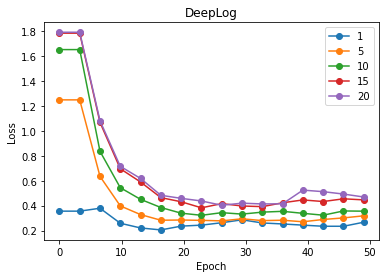

In [8]:
data = ['dl_01_loss','dl_05_loss','dl_10_loss','dl_15_loss','dl_20_loss']
name = ['1', '5', '10', '15', '20']
for j, i in enumerate(data):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j], marker = 'o')
        continue
    plt.plot(x, y, label = name[j])


plt.xlabel('Epoch')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('DeepLog')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_add/client_dl_loss.svg', bbox_inches='tight', format="svg")
plt.show()

## 本地更新輪數不同之成效

In [11]:
# loganomaly 
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

la_05_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_05_loss = np.sum([la_05_loss, df['loss']], axis = 0)
    del df
    
la_05_loss = la_05_loss/5
#####################################

## 本地輪數固定調整全局模型的效果

## 全局EPOCH的效果

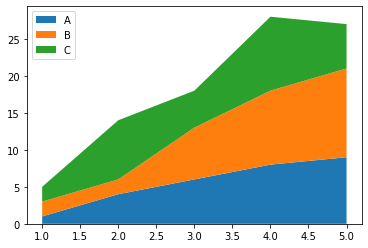

In [12]:
#laganomaly

x=range(1,6)
y1=[1,4,6,8,9]
y2=[2,2,7,10,12]
y3=[2,8,5,10,6]

# Basic stacked area chart.
plt.stackplot(x, y1, y2, y3, labels=['A','B','C'])
plt.legend(loc='upper left')

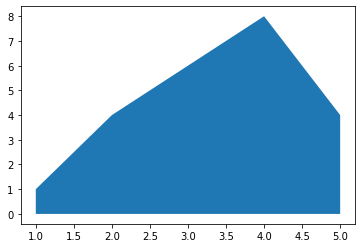

In [13]:
x=range(1,6)
y=[1,4,6,8,4]

# Area plot
plt.fill_between(x, y)
plt.show()

In [14]:
# 150epoch
fl_algo = 'fedadam_10e_12_0.03'

string = '../result/150e/la/' + fl_algo + '/f1.csv'
df = pd.read_csv(string, header = None)
df = np.mean(np.array(df), axis = 0)
la_150_f1 = np.array(df[1:])
del df
##########################
# 100epoch
string = '../result/100e/la/' + fl_algo + '/f1.csv'
df = pd.read_csv(string, header = None)
df = np.mean(np.array(df), axis = 0)
la_100_f1 = np.array(df[1:])
del df
##########################
# 50epoch
string = '../result/loganomaly_sl_dp/fedadam_10e_12_0.03/f1.csv'
df = pd.read_csv(string, header = None)
df = np.mean(np.array(df), axis = 0)
la_50_f1 = np.array(df[1:])
del df
##########################
# 10epoch
string = '../result/10e/la/' + fl_algo + '/f1.csv'
df = pd.read_csv(string, header = None)
df = np.mean(np.array(df), axis = 0)
la_10_f1 = np.array(df[1:])
del df
##########################
# 1epoch
string = '../result/1e/la/' + fl_algo + '/f1.csv'
df = pd.read_csv(string, header = None)
df = np.mean(np.array(df), axis = 0)
la_1_f1 = np.array(df[1:])
del df

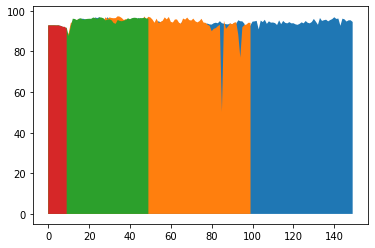

In [15]:
x=range(150)
# Area plot
plt.fill_between(x, la_150_f1)
plt.fill_between(x[:100], la_100_f1)
plt.fill_between(x[:50], la_50_f1)
plt.fill_between(x[:10], la_10_f1)
plt.fill_between(x[:1], la_1_f1)
plt.show()

In [16]:
data = [la_150_f1, la_100_f1, la_50_f1, la_10_f1]
name = ['150','100','50','10']

for j, i in enumerate(data):
    x = np.arange(len(i))
    y = i
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j], marker = 'o')
        continue
    plt.plot(x, y, label = name[j])

# plt.plot([1], la_1_f1, label = '1')

plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Global')
plt.legend()
if save_fig:
#     plt.savefig('../result/fig_v2/dl_fl_useful.svg', bbox_inches='tight', format="svg")
plt.show()

IndentationError: expected an indented block (<ipython-input-16-705fe6361046>, line 29)

In [17]:
y = la_10_f1
x = np.arange(10)

c = interp1d(x, y, kind = "cubic")
x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
y = c(x)
y = lbound(y)

fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
plt.plot(x, fit2.fittedvalues, label = '10', marker = 'o')

t = x[-1]
ty = fit2.fittedvalues[-1]
#########
y = np.concatenate((la_10_f1[-1] + la_50_f1[10:]), axis = None)
x = np.arange(10,50)

c = interp1d(x, y, kind = "cubic")
x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
y = c(x)
y = lbound(y)

fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
x = np.concatenate((t,x), axis = None)
ft = np.concatenate((ty,fit2.fittedvalues), axis = None)

plt.plot(x, ft, label = '50', marker = 'o')

t = x[-1]
ty = fit2.fittedvalues[-1]
#########
y = np.concatenate((la_50_f1[-1] + la_100_f1[50:]), axis = None)
x = np.arange(50,100)

c = interp1d(x, y, kind = "cubic")
x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
y = c(x)
y = lbound(y)

fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)   
x = np.concatenate((t,x), axis = None)
ft = np.concatenate((ty,fit2.fittedvalues), axis = None)

plt.plot(x, ft, label = '100', marker = 'o')

t = x[-1]
ty = fit2.fittedvalues[-1]
#########
y = np.concatenate((la_100_f1[-1] + la_150_f1[100:]), axis = None)
x = np.arange(100,150)

c = interp1d(x, y, kind = "cubic")
x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
y = c(x)
y = lbound(y)

fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)   
x = np.concatenate((t,x), axis = None)
ft = np.concatenate((ty,fit2.fittedvalues), axis = None)

plt.plot(x, ft, label = '150', marker = 'o')
#########


plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Global')
plt.legend()
if save_fig:
#     plt.savefig('../result/fig_v2/dl_fl_useful.svg', bbox_inches='tight', format="svg")
plt.show()

IndentationError: expected an indented block (<ipython-input-17-459b1e1f40a6>, line 74)

In [18]:
y = la_10_f1
x = np.arange(10)

c = interp1d(x, y, kind = "cubic")
x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
y = c(x)
y = lbound(y)

fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
plt.plot(x, fit2.fittedvalues, label = '10', marker = 'o')
#########
y = la_50_f1[10:]
x = np.arange(10,50)

c = interp1d(x, y, kind = "cubic")
x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
y = c(x)
y = lbound(y)

fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
plt.plot(x, fit2.fittedvalues, label = '50', marker = 'o')
#########
y = la_100_f1[50:]
x = np.arange(50,100)

c = interp1d(x, y, kind = "cubic")
x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
y = c(x)
y = lbound(y)

fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
plt.plot(x, fit2.fittedvalues, label = '100', marker = 'o')
#########
y = la_150_f1[100:]
x = np.arange(100,150)

c = interp1d(x, y, kind = "cubic")
x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
y = c(x)
y = lbound(y)

fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
plt.plot(x, fit2.fittedvalues, label = '150', marker = 'o')
#########


plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Global')
plt.legend()
if save_fig:
#     plt.savefig('../result/fig_v2/dl_fl_useful.svg', bbox_inches='tight', format="svg")
plt.show()

IndentationError: expected an indented block (<ipython-input-18-dce49170b72d>, line 56)

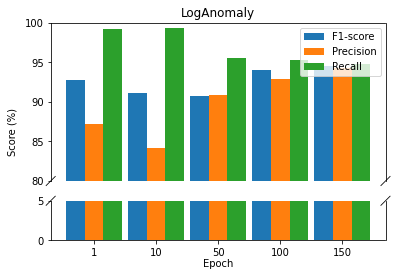

In [19]:
la_f1 = [92.775, 91.129, 90.697, 94.062, 94.527]
la_pr = [87.151, 84.184, 90.880, 92.859, 94.281]
la_re = [99.174, 99.323, 95.542, 95.296, 94.774]

x = ["1", "10", "50", "100", "150"]
x_axis = np.arange(len(x))
width = 0.3

bax = brokenaxes(ylims=[(0, 5), (80, 100)], despine=False)

bax.bar(x_axis - width, la_f1, width=width, label = 'F1-score')
bax.bar(x_axis, la_pr, width=width, label = 'Precision')
bax.bar(x_axis + width, la_re, width=width, label = 'Recall')

bax.set_title("LogAnomaly")
bax.set_xticks(x_axis, x)
bax.set_xlabel("Epoch")
bax.set_ylabel("Score (%)")
bax.legend()
if save_fig:
    plt.savefig('../result/fig_add/global_la.svg', bbox_inches='tight', format="svg")
plt.show()

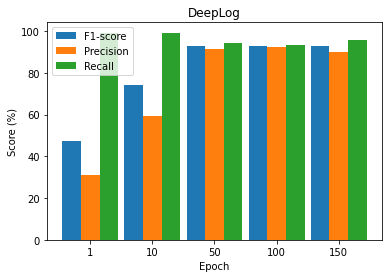

In [20]:
dl_f1 = [47.219, 74.163, 92.868, 92.729, 92.771]
dl_pr = [30.980, 59.303, 91.654, 92.268, 89.994]
dl_re = [99.234, 98.961, 94.115, 93.194, 95.724]

x = ["1", "10", "50", "100", "150"]
x_axis = np.arange(len(x))
width = 0.3

plt.bar(x_axis - width, dl_f1, width=width, label = 'F1-score')
plt.bar(x_axis, dl_pr, width=width, label = 'Precision')
plt.bar(x_axis + width, dl_re, width=width, label = 'Recall')

plt.title("DeepLog")
plt.xticks(x_axis, x)
plt.xlabel("Epoch")
plt.ylabel("Score (%)")
plt.legend()
if save_fig:
    plt.savefig('../result/fig_add/global_dl.svg', bbox_inches='tight', format="svg")
plt.show()

## 1e與10e的比較

In [23]:
# loganomaly 1 epochs 3
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_1e_12_0.03'

la_1e_003_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_1e_003_loss = np.sum([la_1e_003_loss, df['loss']], axis = 0)
    del df
    
la_1e_003_loss = la_1e_003_loss/5
#####################################
# loganomaly 10 epochs 3
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

la_10e_003_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_10e_003_loss = np.sum([la_10e_003_loss, df['loss']], axis = 0)
    del df
    
la_10e_003_loss = la_10e_003_loss/5
#####################################
# loganomaly 1 epochs 0
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_1e_12_0'

la_1e_000_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_1e_000_loss = np.sum([la_1e_000_loss, df['loss']], axis = 0)
    del df
    
la_1e_000_loss = la_1e_000_loss/5
#####################################
# loganomaly 10 epochs 0
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0'

la_10e_000_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_10e_000_loss = np.sum([la_10e_000_loss, df['loss']], axis = 0)
    del df
    
la_10e_000_loss = la_10e_000_loss/5

In [24]:
# deeplog 1 epochs 3
log_algo = 'deeplog_sl_dp'
fl_algo = 'fedadam_1e_12_0.03'

dl_1e_003_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_1e_003_loss = np.sum([dl_1e_003_loss, df['loss']], axis = 0)
    del df
    
dl_1e_003_loss = dl_1e_003_loss/5
#####################################
# deeplog 10 epochs 3
log_algo = 'deeplog_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

dl_10e_003_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_10e_003_loss = np.sum([dl_10e_003_loss, df['loss']], axis = 0)
    del df
    
dl_10e_003_loss = dl_10e_003_loss/5
#####################################
# deeplog 1 epochs 0
log_algo = 'deeplog_sl_dp'
fl_algo = 'fedadam_1e_12_0'

dl_1e_000_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_1e_000_loss = np.sum([dl_1e_000_loss, df['loss']], axis = 0)
    del df
    
dl_1e_000_loss = dl_1e_000_loss/5
#####################################
# deeplog 10 epochs 0
log_algo = 'deeplog_sl_dp'
fl_algo = 'fedadam_10e_12_0'

dl_10e_000_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_10e_000_loss = np.sum([dl_10e_000_loss, df['loss']], axis = 0)
    del df
    
dl_10e_000_loss = dl_10e_000_loss/5

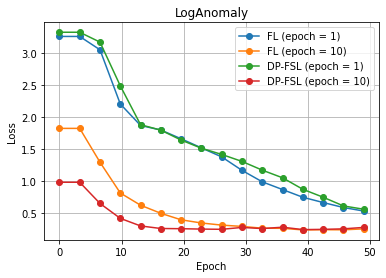

In [67]:
# data = ['la_1e_000_loss','la_10e_000_loss','la_1e_003_loss','la_10e_003_loss',]
# name = ['(\u03B5) = 0, local epoch = 1','(\u03B5) = 0, local epoch = 10'
#         ,'(\u03B5) = 0.03, local epoch = 1','(\u03B5) = 0.03, local epoch = 10']
data = ['la_12_adam_loss','la_102_adam_loss','la_1e_000_loss','la_10e_000_loss']
name = ['FL (epoch = 1)','FL (epoch = 10)', 'DP-FSL (epoch = 1)','DP-FSL (epoch = 10)']
for j, i in enumerate(data):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j], marker = 'o')
        continue
    plt.plot(x, y, label = name[j])


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('LogAnomaly')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_add/local_la_loss.svg', bbox_inches='tight', format="svg")
plt.show()

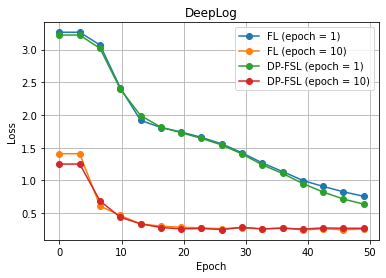

In [68]:
# data = ['dl_1e_000_loss','dl_10e_000_loss','dl_1e_003_loss','dl_10e_003_loss',]
# name = ['(\u03B5) = 0, local epoch = 1','(\u03B5) = 0, local epoch = 10'
#         ,'(\u03B5) = 0.03, local epoch = 1','(\u03B5) = 0.03, local epoch = 10']
data = ['dl_12_adam_loss','dl_102_adam_loss','dl_1e_000_loss','dl_10e_000_loss']
name = ['FL (epoch = 1)','FL (epoch = 10)', 'DP-FSL (epoch = 1)','DP-FSL (epoch = 10)']
for j, i in enumerate(data):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
        fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.9, optimized=False)    
        plt.plot(x, fit2.fittedvalues, label = name[j], marker = 'o')
        continue
    plt.plot(x, y, label = name[j])


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('DeepLog')
plt.legend()
if save_fig:
    plt.savefig('../result/fig_add/local_dl_loss.svg', bbox_inches='tight', format="svg")
plt.show()

Text(33.0, 0.5, 'Local epoch')

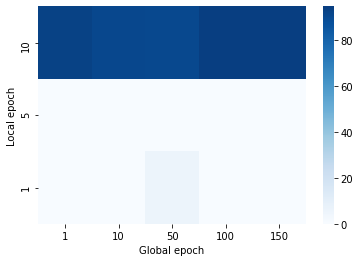

In [56]:
import pandas as pd
import seaborn as sns
local_e = ['10','5','1']
global_e = ['1', '10', '50', '100', '150']
df = pd.DataFrame([
    [92.775, 91.129, 90.697, 94.062, 94.527],
    [0, 0, 0, 0, 0],
    [0, 0, 5.737, 0, 0],
], columns=global_e, index=local_e)


sns.heatmap(df, cmap = 'Blues', center = 50)
plt.xlabel('Global epoch')
plt.ylabel('Local epoch')